<img src='https://github.com/wekeo/ai4EM_MOOC/raw/04147f290cfdcce341f819eab7ad037b95f25600/img/ai4eo_logos.jpg' alt='Logo EU Copernicus WEkEO' align='center' width='100%'></img>

# WEKEO UNIVERSITY TRAINING

<div style="text-align: right"><i> INTERMEDIATE LEVEL </i></div>

***
<center><h1> Studying the impacts of Wildfires on vegetation cover and ocean parameters </h1></center>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>

**General Note 3**: To explore more (Python and R) content, there is our [**Jupyter Catalogue**](https://notebooks.apps.mercator.dpi.wekeo.eu/), and if you seek support, there are plenty of useful resources in our [**Help Center**](https://help.wekeo.eu/en/). Feel free to contact us using our [**live chat widget**](https://www.wekeo.eu/support) or asynchronously at [support@wekeo.eu](support@wekeo.eu) ! <br>
***

# Table of contents
- [1. Introduction](#1.-Introduction)
- [2. Setting up the Python environment](#2.-Setting-up-the-Python-environment)
    - [2.1 Required Python modules](#2.1-Required-Python-modules)
    - [2.2. Presentation of the products used](#2.2.-Presentation-of-the-product-used)
- [3. Spotting wildfires thanks to air quality data](#3.-Spotting-wildfires-thanks-to-air-quality-data.)
    - [3.1. Presentation of the products used](#3.1.-Presentation-of-the-products-used.)
    - [3.2. Retrieving the data](#3.2.-Retrieving-the-data)
    - [3.3 Exploring the dataset](#3.3-Exploring-the-dataset)
      - [3.3.1. Pre-processing](#3.3.1.-Pre-processing)
      - [3.3.2 Subset the dataset](#3.3.2-Subset-the-dataset)
      - [3.3.3. Plotting a map and spotting a wildifre](#3.3.3.-Plotting-a-map-and-spotting-a-wildifre)
- [4. Estimating vegetation loss with satellite images](#4.-Estimating-vegetation-loss-with-satellite-images)
    - [4.1. Data](#4.1.-Data)
    - [4.2. Visualizing the forest](#4.2.-Visualizing-the-forest.)
    - [4.3. Characterization of vegetation loss](#4.3.-Characterization-of-vegetation-loss)
- [5. Impact on CO2 in the Bay of Biscay](#5.-Impact-on-CO2-in-the-Bay-of-Biscay)
    - [5.1. Data](#5.1.-Data)
    - [5.2. Impact on the CO2 partial pressure](#5.2.-Impact-on-the-CO2-partial-pressure)
    - [5.3. Impact on the seawater ph](#5.3.-Impact-on-the-seawater-ph.)
- [6. Conclusion](#6.-Conclusion)
- [7. Exercises](#7.-Exercises)

# 1. Introduction

[Go back to the "Table of contents"](#Table-of-contents)

Welcome to this WEkEO University training! 

Wildfires are expected to happen more and more frequently in the next decades, as forests around the world are undergoing increasing stress due to heat and droughts. The recent wildfire that devastated Australia in 2019-2020, or more recently the many wildfires that happened across Europe during the heatwave of Summer 2022. Below is a map of the extreme weather events, including wildfires, that happened around the Mediterranean Sea in Summer 2022, made by [Le Monde](https://www.lemonde.fr/en/environment/article/2022/08/21/map-of-europe-and-the-mediterranean-s-summer-temperatures-and-extreme-weather-events_5994301_114.html).

<center>
    <img src="https://mercator.dpi.wekeo.eu:8080/swift/v1/AUTH_e3e873ffa6874f3fad0bb976064606a7/bucketdrive/imgs-training/2022_wildfires.png" width="400">
</center>

Wildfires generate a very high amount of CO2, and its concentration in the atmosphere drives the acidification of the oceans. Ocean acification is expected to have a negative impact on all marine wildlife: it weakens coral structures, favors the development of toxic algae, and affects food sources for marine creatures (see more on the  [Copernicus Marine Service](https://marine.copernicus.eu/explainers/phenomena-threats/ocean-acidification) website). In this case study, focusing on the European West Coast, we will investigate if we can find an immediate effect of the Summer 2022 wildfires on the ocean surface pressure of CO2, and on its ph.

In this notebook, you will learn to retrieve, open and visualize data from the WEkEO data portal. We will spot a wildifire using carbon monoxide and particlate matter emissions data, then focus on the concerned forest to estimate its vegetation loss, and finally we will try to assess if the fires have had a noticeable impact on the waters nearby.

# 2. Setting up the Python environment

## 2.1 Required Python modules
[Go back to the "Table of contents"](#Table-of-contents)

The Jupyter Notebook must be set up with all the necessary available tools from the Jupyter Notebook ecosystem. Here is the list of the modules we will be using in this exercise.

| Module name | Description |
| :---: | :---|
| **numpy** | [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python and for managing ND-arrays. |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) is a very user friendly library to manipulate NetCDF files within Python. It introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces high quality figures. |
| **cartopy** |[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a library for plotting maps and geospatial data analyses in Python. |
| **rasterio** |[Rasterio](https://rasterio.readthedocs.io/en/latest/) is a library used to manipulate geo-referenced raster data. In this notebook, it will be used to interact with satellite images.  |
|**geopandas**|[Geopandas](https://geopandas.org/en/stable/) is a library that allows spatial operation on geometric data.|

In [1]:
import warnings
warnings.filterwarnings('ignore')
import getpass
import os

# Modules related to data retrieving
from hda import Client
import json
import fsspec

# Modules related to plot and EO data manipulation
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import rasterio
import geopandas as gpd
from shapely.geometry import box
from fiona.crs import from_epsg
from rasterio.mask import mask

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/envs/miniwekeolab/share/proj failed


📌 **Note**: If the error related to `proj_create_from_database` is displayed, you can disregard it, it won't affect the execution of the notebook.

## 2.2 Cloud File Object Storage Paths
[Go back to the "Table of contents"](#Table-of-contents)

The Jupyter Notebook being now set up in terms of tools, there is one more thing that will be required for running exercices: **datasets**! 
Below cell specifies location of file objects, stored on the WEkEO Cloud.

In [2]:
training_bucket = "https://mercator.dpi.wekeo.eu:8080/swift/v1/AUTH_e3e873ffa6874f3fad0bb976064606a7/bucketdrive/data-training"

wekeo_store = {
    "air_quality_request" : f"{training_bucket}/air_quality_req.json",
    "wildfire_concentration" : f"{training_bucket}/air_quality/adaptor.cams_regional_fc.retrieve-1674750381.0724552-21318-3-11e1d446-2261-4658-93e9-1c220b2b2236.nc",
    "S2B_r_06" : f"{training_bucket}/S2/S2B_MSIL2A_20220617T105629_N0400_R094_T30TXQ_20220617T124553.SAFE/GRANULE/L2A_T30TXQ_A027576_20220617T105916/IMG_DATA/R10m/T30TXQ_20220617T105629_B04_10m.jp2",
    "S2B_g_06" : f"{training_bucket}/S2/S2B_MSIL2A_20220617T105629_N0400_R094_T30TXQ_20220617T124553.SAFE/GRANULE/L2A_T30TXQ_A027576_20220617T105916/IMG_DATA/R10m/T30TXQ_20220617T105629_B03_10m.jp2",
    "S2B_b_06" : f"{training_bucket}/S2/S2B_MSIL2A_20220617T105629_N0400_R094_T30TXQ_20220617T124553.SAFE/GRANULE/L2A_T30TXQ_A027576_20220617T105916/IMG_DATA/R10m/T30TXQ_20220617T105629_B02_10m.jp2",
    "S2B_nir_06" : f"{training_bucket}/S2/S2B_MSIL2A_20220617T105629_N0400_R094_T30TXQ_20220617T124553.SAFE/GRANULE/L2A_T30TXQ_A027576_20220617T105916/IMG_DATA/R10m/T30TXQ_20220617T105629_B08_10m.jp2",
    "S2B_r_09" : f"{training_bucket}/S2/S2B_MSIL2A_20220915T105639_N0400_R094_T30TXQ_20220915T135143.SAFE/GRANULE/L2A_T30TXQ_A028863_20220915T110822/IMG_DATA/R10m/T30TXQ_20220915T105639_B04_10m.jp2",
    "S2B_g_09" : f"{training_bucket}/S2/S2B_MSIL2A_20220915T105639_N0400_R094_T30TXQ_20220915T135143.SAFE/GRANULE/L2A_T30TXQ_A028863_20220915T110822/IMG_DATA/R10m/T30TXQ_20220915T105639_B03_10m.jp2",
    "S2B_b_09" : f"{training_bucket}/S2/S2B_MSIL2A_20220915T105639_N0400_R094_T30TXQ_20220915T135143.SAFE/GRANULE/L2A_T30TXQ_A028863_20220915T110822/IMG_DATA/R10m/T30TXQ_20220915T105639_B02_10m.jp2",
    "S2B_nir_09" : f"{training_bucket}/S2/S2B_MSIL2A_20220915T105639_N0400_R094_T30TXQ_20220915T135143.SAFE/GRANULE/L2A_T30TXQ_A028863_20220915T110822/IMG_DATA/R10m/T30TXQ_20220915T105639_B08_10m.jp2",
    "co2_reanalysis" : f"{training_bucket}/co2_cmems/cmems_mod_ibi_bgc_my_0.083deg-3D_P1M-m_1674748413721.nc",
    "co2_analysis" : f"{training_bucket}/co2_cmems/cmems_mod_ibi_bgc_anfc_0.027deg-3D_P1M-m_1674748436143.nc",
    "ph_reanalysis" : f"{training_bucket}/ph_cmems/cmems_mod_ibi_bgc_my_0.083deg-3D_P1M-m_1674748003025.nc",
    "ph_analysis" : f"{training_bucket}/ph_cmems/cmems_mod_ibi_bgc_anfc_0.027deg-3D_P1M-m_1674747957670.nc"
    }

# 3. Spotting wildfires thanks to air quality data
[Go back to the "Table of contents"](#Table-of-contents)

Wildfires emit a lot of different gases and matter and therefore alter the local air quality. The analysis of parameters such as carbon monoxide of particulate matter emissions should help highlight such phenomena.

## 3.1. Presentation of the products used
[Go back to the "Table of contents"](#Table-of-contents)

From the WEkEO [Data Viewer](https://www.wekeo.eu/data?view=viewer), you can explore all the products available with many filters to select the region you are interested in, the parameters you want to study, etc.

In this section, we are going to use the [CAMS European air quality forecasts](https://www.wekeo.eu/data?view=dataset&dataset=EO%3AECMWF%3ADAT%3ACAMS_EUROPE_AIR_QUALITY_FORECASTS&initial=1) product to spot wildfires. It gathers the daily air quality analysis and forecasts of 9 different models. Here we are going to use the models median to conduct our study. The data has a spatial resolution of approximately 10 km and an hourly frequency. We have downloaded the 
**carbon monoxide**, **PM2.5** ( Particulate matter d < 2.5 µm) and **PM10** variables, from June to September 2022.

| Parameter | Value |
| :---: | :---|
| **Variables used** | `co_conc`, `pm10_conc`, `pm2p5_conc` |
| **Product identifier** |[EO:ECMWF:DAT:CAMS_EUROPE_AIR_QUALITY_FORECASTS](https://www.wekeo.eu/data?view=dataset&dataset=EO%3AECMWF%3ADAT%3ACAMS_EUROPE_AIR_QUALITY_FORECASTS&initial=1) |
| **Spatial resolution** | 0.1 degrees, approx. 10km |
| **Temporal resolution** | hourly |
| **Temporal coverage** | from 2020-01-27 to now |

<center>
    <img src="https://mercator.dpi.wekeo.eu:8080/swift/v1/AUTH_e3e873ffa6874f3fad0bb976064606a7/bucketdrive/imgs-training/air_qual.png" width="300">
</center>


## 3.2. Retrieving the data

[Go back to the "Table of contents"](#Table-of-contents)

There are many ways to [download data in WEkEO](https://help.wekeo.eu/en/articles/6416936-how-to-download-wekeo-data). You can do it manually from the [Data Viewer](https://www.wekeo.eu/data?view=viewer), but here we will download data through Python, using the Harmonized Data Access (HDA) API provided by WEkEO. The HDA client provides a fully compliant Python3 client that can be used to search and download products using the Harmonized Data Access WEkEO API.


First you need to make sure you have a `.hdarc` saved in your root directory. Follow the method described [here](https://help.wekeo.eu/en/articles/6751608-install-the-hda-api-python-client). 

📌 **Note**: For the sake of convenience, you can run the following cell to generate it automatically:

In [3]:
from pathlib import Path

hdarc = Path('/home/jovyan/.hdarc')
if not hdarc.is_file():
    import getpass
    USERNAME = input('Enter your username: ')
    PASSWORD = getpass.getpass('Enter your password: ')

    with open('/home/jovyan/.hdarc', 'w') as f:
        f.write(f'user: {USERNAME}\n')
        f.write(f'password:{PASSWORD}\n')
else:
    print('Configuration file already exists.')

Configuration file already exists.


You are now ready to download data. We write the API request, i.e. specify which product we want, which parameters, etc. The request we have used to download the air quality data can be found in the `wekeo_store` cloud folder, file `air_quality_req.json`. You can read it and modify it programmatically or by right clicking on the file and then selecting "Open With -> Editor" (once downloaded locally).

To write a new request, the easiest way is to select your data parameters in the WEkEO Data Viewer, click on [`Show API request` (HowTo)](https://help.wekeo.eu/en/articles/6416936-how-to-download-wekeo-data#h_a1de0507c1), and copy/paste it in a file.

<center>
    <img src="https://mercator.dpi.wekeo.eu:8080/swift/v1/AUTH_e3e873ffa6874f3fad0bb976064606a7/bucketdrive/imgs-training/api_req.png" width="300">
</center>

Let's visualize our request.

In [4]:
# Loading request from json file
with fsspec.open(wekeo_store['air_quality_request'], 'r') as f:
    air_quality_data_request = json.load(f)
print(air_quality_data_request)

{'datasetId': 'EO:ECMWF:DAT:CAMS_EUROPE_AIR_QUALITY_FORECASTS', 'boundingBoxValues': [{'name': 'area', 'bbox': [-15, 38, 5, 55]}], 'dateRangeSelectValues': [{'name': 'date', 'start': '2022-06-01T00:00:00.000Z', 'end': '2022-09-01T00:00:00.000Z'}], 'multiStringSelectValues': [{'name': 'variable', 'value': ['carbon_monoxide', 'particulate_matter_2.5um', 'particulate_matter_10um', 'pm10_wildfires']}, {'name': 'type', 'value': ['analysis']}, {'name': 'model', 'value': ['ensemble']}, {'name': 'level', 'value': ['0']}, {'name': 'time', 'value': ['00:00', '04:00', '08:00', '12:00', '16:00', '20:00', '01:00', '05:00', '09:00', '13:00', '17:00', '21:00', '02:00', '06:00', '10:00', '14:00', '18:00', '22:00', '23:00', '19:00', '15:00', '11:00', '07:00', '03:00']}, {'name': 'leadtime_hour', 'value': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', 

Running the next cell will launch [the downloading of the data (more details)](https://help.wekeo.eu/en/articles/6416936-how-to-download-wekeo-data). Depending on the product and request, it may take some time. 

📌 **Note**: In this training, the products are already downloaded and stored in the `wekeo_store` cloud folder, so **it is not necessary to run the next cell**.

In [5]:
## Instantiate the Harmonized Data Access (HDA) API
#c = Client(debug=False)

# Accept terms if not yet done
#c.accept_tac()

## Path to local data storage
#output_path = '/tmp/air_quality'

## Run the search with query
#matches = c.search(data)

## Print results
#print(matches)

## Store results to local data storage
#matches.download(output_path)

## 3.3 Exploring the dataset

[Go back to the "Table of contents"](#Table-of-contents)

The needed `wildfire_concentration` datasets are located in the `wekeo_store`. Let's now open it using the **`xarray`** library.

In [6]:
# Open the file object
data = fsspec.open(wekeo_store['wildfire_concentration']).open()
# Read it with xarray
print("This may time up to 10 seconds depending on where you run this notebook.")
ds_aq = xr.open_dataset(data)
ds_aq

This may time up to 10 seconds depending on where you run this notebook.


<xarray.Dataset>
Dimensions:     (longitude: 200, latitude: 170, level: 1, time: 2232)
Coordinates:
  * longitude   (longitude) float32 345.0 345.1 345.2 345.4 ... 4.75 4.85 4.95
  * latitude    (latitude) float32 54.95 54.85 54.75 54.65 ... 38.25 38.15 38.05
  * level       (level) float32 0.0
  * time        (time) timedelta64[ns] 00:00:00 01:00:00 ... 92 days 23:00:00
Data variables:
    co_conc     (time, level, latitude, longitude) float32 ...
    pm10_conc   (time, level, latitude, longitude) float32 ...
    pm2p5_conc  (time, level, latitude, longitude) float32 ...
    pmwf_conc   (time, level, latitude, longitude) float32 ...
Attributes:
    title:        CO/PM10/PM25/PM_Wildfire Air Pollutant ANALYSIS at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE ANALYSIS
    ANALYSIS:     Europe, 20220601-20220901+[0H_23H]
    summary:      ENSEMBLE model hourly ANALYSIS of CO/PM10/PM25/PM_Wildfire ...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

### 3.3.1. Pre-processing

[Go back to the "Table of contents"](#Table-of-contents)

For convenience, we're going to pre-process the data before analyzing it:
*  The dates are expressed as timedeltas (i.e. as durations elapsed after the first date of the data). We want actual dates (format: `datetime64`).
*  The longitudes range from 0 to 360°. We are going to shift them, so they range from -180° to 180°.
*  Using hourly data makes the dataset heavier and harder to manipulate, and we don't need such a precise temporal resolution. We will resample the data to have only daily means.

In [7]:
# Converting time to datetime64
ds_aq = ds_aq.assign_coords(time=np.datetime64('2022-06-01') + ds_aq["time"])

# Shifting longitude to [-180,180]
ds_aq.coords['longitude'] = (ds_aq.coords['longitude'] + 180) % 360 - 180
ds_aq = ds_aq.sortby(ds_aq.longitude)

# Resampling to daily means
ds_aq = ds_aq.resample(time='1D').mean('time')

# Show data
ds_aq

<xarray.Dataset>
Dimensions:     (longitude: 200, latitude: 170, level: 1, time: 93)
Coordinates:
  * longitude   (longitude) float32 -14.95 -14.85 -14.75 ... 4.75 4.85 4.95
  * latitude    (latitude) float32 54.95 54.85 54.75 54.65 ... 38.25 38.15 38.05
  * level       (level) float32 0.0
  * time        (time) datetime64[ns] 2022-06-01 2022-06-02 ... 2022-09-01
Data variables:
    co_conc     (time, level, latitude, longitude) float32 99.34 99.38 ... 113.1
    pm10_conc   (time, level, latitude, longitude) float32 4.681 4.611 ... 28.51
    pm2p5_conc  (time, level, latitude, longitude) float32 2.356 2.332 ... 13.03
    pmwf_conc   (time, level, latitude, longitude) float32 2.367e-05 ... 0.02917
Attributes:
    title:        CO/PM10/PM25/PM_Wildfire Air Pollutant ANALYSIS at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE ANALYSIS
    ANALYSIS:     Europe, 20220601-20220901+[0H_23H]
    summary:      ENSEMBLE model hourly ANALYSIS of CO/PM10/PM25/PM_Wildfire ...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

### 3.3.2 Subset the dataset
[Go back to the "Table of contents"](#Table-of-contents)

The most common thing you will want to do with your dataset is to subset it, to select a specific geographic area, depth and/or time period. To do so, we will use the functions [`.sel`](https://xarray.pydata.org/en/stable/generated/xarray.DataArray.sel.html) and [`.isel`](https://xarray.pydata.org/en/stable/generated/xarray.DataArray.isel.html). 

The following cell shows, as an example, different ways to select a datetime or a range of datetimes from the `ds_aq` dataset. Indeed, we have seen that this dataset contains 2232 datetimes and we may need to reduce it. These methods can of course be used with any other dimension of the dataset, you just have to check on the dimensions names before.

In [8]:
# Check the date times included in the file
ds_aq['time']

<xarray.DataArray 'time' (time: 93)>
array(['2022-06-01T00:00:00.000000000', '2022-06-02T00:00:00.000000000',
       '2022-06-03T00:00:00.000000000', '2022-06-04T00:00:00.000000000',
       '2022-06-05T00:00:00.000000000', '2022-06-06T00:00:00.000000000',
       '2022-06-07T00:00:00.000000000', '2022-06-08T00:00:00.000000000',
       '2022-06-09T00:00:00.000000000', '2022-06-10T00:00:00.000000000',
       '2022-06-11T00:00:00.000000000', '2022-06-12T00:00:00.000000000',
       '2022-06-13T00:00:00.000000000', '2022-06-14T00:00:00.000000000',
       '2022-06-15T00:00:00.000000000', '2022-06-16T00:00:00.000000000',
       '2022-06-17T00:00:00.000000000', '2022-06-18T00:00:00.000000000',
       '2022-06-19T00:00:00.000000000', '2022-06-20T00:00:00.000000000',
       '2022-06-21T00:00:00.000000000', '2022-06-22T00:00:00.000000000',
       '2022-06-23T00:00:00.000000000', '2022-06-24T00:00:00.000000000',
       '2022-06-25T00:00:00.000000000', '2022-06-26T00:00:00.000000000',
       '2022-06-27T00:00:00.000000000', '2022-06-28T00:00:00.000000000',
       '2022-06-29T00:00:00.000000000', '2022-06-30T00:00:00.000000000',
       '2022-07-01T00:00:00.000000000', '2022-07-02T00:00:00.000000000',
       '2022-07-03T00:00:00.000000000', '2022-07-04T00:00:00.000000000',
       '2022-07-05T00:00:00.000000000', '2022-07-06T00:00:00.000000000',
       '2022-07-07T00:00:00.000000000', '2022-07-08T00:00:00.000000000',
       '2022-07-09T00:00:00.000000000', '2022-07-10T00:00:00.000000000',
       '2022-07-11T00:00:00.000000000', '2022-07-12T00:00:00.000000000',
       '2022-07-13T00:00:00.000000000', '2022-07-14T00:00:00.000000000',
       '2022-07-15T00:00:00.000000000', '2022-07-16T00:00:00.000000000',
       '2022-07-17T00:00:00.000000000', '2022-07-18T00:00:00.000000000',
       '2022-07-19T00:00:00.000000000', '2022-07-20T00:00:00.000000000',
       '2022-07-21T00:00:00.000000000', '2022-07-22T00:00:00.000000000',
       '2022-07-23T00:00:00.000000000', '2022-07-24T00:00:00.000000000',
       '2022-07-25T00:00:00.000000000', '2022-07-26T00:00:00.000000000',
       '2022-07-27T00:00:00.000000000', '2022-07-28T00:00:00.000000000',
       '2022-07-29T00:00:00.000000000', '2022-07-30T00:00:00.000000000',
       '2022-07-31T00:00:00.000000000', '2022-08-01T00:00:00.000000000',
       '2022-08-02T00:00:00.000000000', '2022-08-03T00:00:00.000000000',
       '2022-08-04T00:00:00.000000000', '2022-08-05T00:00:00.000000000',
       '2022-08-06T00:00:00.000000000', '2022-08-07T00:00:00.000000000',
       '2022-08-08T00:00:00.000000000', '2022-08-09T00:00:00.000000000',
       '2022-08-10T00:00:00.000000000', '2022-08-11T00:00:00.000000000',
       '2022-08-12T00:00:00.000000000', '2022-08-13T00:00:00.000000000',
       '2022-08-14T00:00:00.000000000', '2022-08-15T00:00:00.000000000',
       '2022-08-16T00:00:00.000000000', '2022-08-17T00:00:00.000000000',
       '2022-08-18T00:00:00.000000000', '2022-08-19T00:00:00.000000000',
       '2022-08-20T00:00:00.000000000', '2022-08-21T00:00:00.000000000',
       '2022-08-22T00:00:00.000000000', '2022-08-23T00:00:00.000000000',
       '2022-08-24T00:00:00.000000000', '2022-08-25T00:00:00.000000000',
       '2022-08-26T00:00:00.000000000', '2022-08-27T00:00:00.000000000',
       '2022-08-28T00:00:00.000000000', '2022-08-29T00:00:00.000000000',
       '2022-08-30T00:00:00.000000000', '2022-08-31T00:00:00.000000000',
       '2022-09-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2022-06-01 2022-06-02 ... 2022-09-01

In [9]:
# Subset specifying an exact date
ds_aq.sel(time='2022-06-25')

<xarray.Dataset>
Dimensions:     (longitude: 200, latitude: 170, level: 1)
Coordinates:
  * longitude   (longitude) float32 -14.95 -14.85 -14.75 ... 4.75 4.85 4.95
  * latitude    (latitude) float32 54.95 54.85 54.75 54.65 ... 38.25 38.15 38.05
  * level       (level) float32 0.0
    time        datetime64[ns] 2022-06-25
Data variables:
    co_conc     (level, latitude, longitude) float32 86.01 86.41 ... 97.14 97.68
    pm10_conc   (level, latitude, longitude) float32 23.9 23.53 ... 23.34 22.99
    pm2p5_conc  (level, latitude, longitude) float32 3.642 3.674 ... 12.25 12.36
    pmwf_conc   (level, latitude, longitude) float32 1.125e-05 ... 0.02443
Attributes:
    title:        CO/PM10/PM25/PM_Wildfire Air Pollutant ANALYSIS at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE ANALYSIS
    ANALYSIS:     Europe, 20220601-20220901+[0H_23H]
    summary:      ENSEMBLE model hourly ANALYSIS of CO/PM10/PM25/PM_Wildfire ...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

In [10]:
# If you don't know the exact date and want to take the nearest one
ds_aq.sel(time='2022-06-25T06', method='nearest')

<xarray.Dataset>
Dimensions:     (longitude: 200, latitude: 170, level: 1)
Coordinates:
  * longitude   (longitude) float32 -14.95 -14.85 -14.75 ... 4.75 4.85 4.95
  * latitude    (latitude) float32 54.95 54.85 54.75 54.65 ... 38.25 38.15 38.05
  * level       (level) float32 0.0
    time        datetime64[ns] 2022-06-25
Data variables:
    co_conc     (level, latitude, longitude) float32 86.01 86.41 ... 97.14 97.68
    pm10_conc   (level, latitude, longitude) float32 23.9 23.53 ... 23.34 22.99
    pm2p5_conc  (level, latitude, longitude) float32 3.642 3.674 ... 12.25 12.36
    pmwf_conc   (level, latitude, longitude) float32 1.125e-05 ... 0.02443
Attributes:
    title:        CO/PM10/PM25/PM_Wildfire Air Pollutant ANALYSIS at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE ANALYSIS
    ANALYSIS:     Europe, 20220601-20220901+[0H_23H]
    summary:      ENSEMBLE model hourly ANALYSIS of CO/PM10/PM25/PM_Wildfire ...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

In [11]:
# If you want to select a date from its index
ds_aq.isel(time=[9])

<xarray.Dataset>
Dimensions:     (longitude: 200, latitude: 170, level: 1, time: 1)
Coordinates:
  * longitude   (longitude) float32 -14.95 -14.85 -14.75 ... 4.75 4.85 4.95
  * latitude    (latitude) float32 54.95 54.85 54.75 54.65 ... 38.25 38.15 38.05
  * level       (level) float32 0.0
  * time        (time) datetime64[ns] 2022-06-10
Data variables:
    co_conc     (time, level, latitude, longitude) float32 94.71 94.7 ... 100.4
    pm10_conc   (time, level, latitude, longitude) float32 24.77 25.06 ... 14.69
    pm2p5_conc  (time, level, latitude, longitude) float32 6.695 6.694 ... 4.41
    pmwf_conc   (time, level, latitude, longitude) float32 0.0001218 ... 0.00...
Attributes:
    title:        CO/PM10/PM25/PM_Wildfire Air Pollutant ANALYSIS at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE ANALYSIS
    ANALYSIS:     Europe, 20220601-20220901+[0H_23H]
    summary:      ENSEMBLE model hourly ANALYSIS of CO/PM10/PM25/PM_Wildfire ...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

In [12]:
# If you want to select a range of dates
# Here, let's select the month of July for example
ds_aq.sel(time=slice('2022-07-01','2022-07-31'))

<xarray.Dataset>
Dimensions:     (longitude: 200, latitude: 170, level: 1, time: 31)
Coordinates:
  * longitude   (longitude) float32 -14.95 -14.85 -14.75 ... 4.75 4.85 4.95
  * latitude    (latitude) float32 54.95 54.85 54.75 54.65 ... 38.25 38.15 38.05
  * level       (level) float32 0.0
  * time        (time) datetime64[ns] 2022-07-01 2022-07-02 ... 2022-07-31
Data variables:
    co_conc     (time, level, latitude, longitude) float32 91.7 91.78 ... 114.6
    pm10_conc   (time, level, latitude, longitude) float32 8.106 8.015 ... 11.58
    pm2p5_conc  (time, level, latitude, longitude) float32 2.683 2.672 ... 5.44
    pmwf_conc   (time, level, latitude, longitude) float32 5.921e-07 ... 0.03455
Attributes:
    title:        CO/PM10/PM25/PM_Wildfire Air Pollutant ANALYSIS at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE ANALYSIS
    ANALYSIS:     Europe, 20220601-20220901+[0H_23H]
    summary:      ENSEMBLE model hourly ANALYSIS of CO/PM10/PM25/PM_Wildfire ...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

### 3.3.3. Plotting a map and spotting a wildifre

[Go back to the "Table of contents"](#Table-of-contents)

We are going to make the first analysis with a map of the Carbon Monoxide concentration on July 1st 2022, according to the numerical model product. The following code cell explains all the steps to plot a map on Python, using the `matplotlib.pyplot` function [`pcolor`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolor.html).


In [13]:
# Delimit the area of interest around western europe
LAT_MIN = 38
LAT_MAX = 55
LON_MIN = -15
LON_MAX = 5

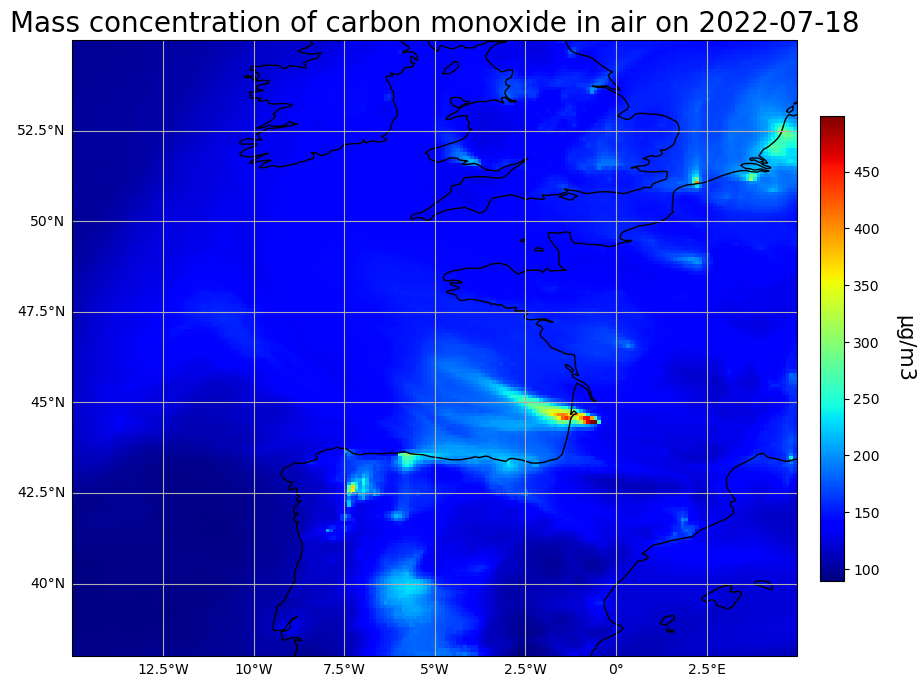

In [14]:
from matplotlib.colors import LogNorm

# Select the temperature parameter, at the date and depth we want, and store it in a variable
# Define a date that is available in the product
date_plot = '2022-07-18'
temp_map = ds_aq['co_conc'].sel(time=date_plot).squeeze()


# Define the caracteristics of the plot
f = plt.figure(figsize=(15, 8))                                                    # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                             # add land mask
ax.set_extent([LON_MIN, LON_MAX, LAT_MIN, LAT_MAX],crs=ccrs.PlateCarree())         # define the extent of the map [lon_min,lon_max,lat_min,lat_max]


# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(temp_map['longitude'].data, temp_map['latitude'].data,temp_map, cmap='jet')


# Add the titles and legend
ax.set_title('Mass concentration of carbon monoxide in air on {}'.format(date_plot),fontsize=20, y=1)              # add a title to the figure
cbar = f.colorbar(im,ax=ax,fraction=0.02, pad=0.02)                                                                # add the colorbar
cbar.set_label('µg/m3', rotation=270,fontsize=15, labelpad=25)                                                     # add the title of the colorbar

# Save figure
# plt.savefig('out/temp_map.png')

On this map, we can see clearly a CO plum going from the South-West Coast to the Atlantic Ocean. This a clear indication of a wildfire. During this period, the Gironde was indeed strucked by a series of wildfires, with the Teste-de-Buch forest almost disappearing. We will focus on it in the next section.

# 4. Estimating vegetation loss with satellite images

[Go back to the "Table of contents"](#Table-of-contents)

Now that we have spotted a wildfire, we are going to assess the amount of vegetation that has been lost. To do this, we will compare two satellite images, one taken before, and one taken after the fires. We will focus on the Teste-de-Buch forest in France.

## 4.1. Data

[Go back to the "Table of contents"](#Table-of-contents)

WEkEO gives also access to Sentinel-2 images. Sentinel-2 is a European multi-spectral imaging satellite mission. It carries an optical instrument payload that samples 13 spectral bands: four bands at 10 m, six bands at 20 m and three bands at 60 m spatial resolution. In this section, we will only use spectral bands with a resolution of 10 meters (blue, green, red, near-infrared), and we will use Level-2A products (Atmospheric corrections have already been applied at this level). To know more about the mission, you can visit ESA's [Sentinel Online](https://sentinel.esa.int/es/web/sentinel/missions/sentinel-2) webpage.

| Parameter | Value |
| :---: | :---|
| **Spectral bands used** | B02, B03, B04, B08 |
| **Product identifier** |[EO:ESA:DAT:SENTINEL-2:MSI](https://www.wekeo.eu/data?view=dataset&dataset=EO%3AESA%3ADAT%3ASENTINEL-2%3AMSI) |
| **Spatial resolution** | 10 meters|
| **Temporal coverage** | from 2015-06-23 to now |

<center>
    <img src="https://mercator.dpi.wekeo.eu:8080/swift/v1/AUTH_e3e873ffa6874f3fad0bb976064606a7/bucketdrive/imgs-training/S2_thumbnail.png" width="200">
</center>

We downloaded an image in June 2022, and another in September 2022. To download the two images, we used the following requests: `vegetation_req_06.json` and `vegetation_req_09.json`.  
The files are downloaded in `.zip` format and needs to be unzipped. The cell below shows how to do it (to know more: [In which format the WEkEO data are delivered?](https://help.wekeo.eu/en/articles/6367964-in-which-format-the-wekeo-data-are-delivered)).   

📌 **Note**: In this training, the products are already unzipped in the `wekeo_store` cloud folder, so **it is not necessary to run the next cell**.

In [15]:
## Sentinel 2
## Unzip the product
#import zipfile

## Edit the path with the name of the zipfile!
#with zipfile.ZipFile("data/S2/S2B_MSIL2A_20220617T105629_N0400_R094_T30TXQ_20220617T124553.zip", 'r') as zip_ref:
#    zip_ref.extractall("data/S2/")

## ADVICE : when you are done extracting the files, deleting the zip folder, in order to save memory space.

<GeoAxes: >

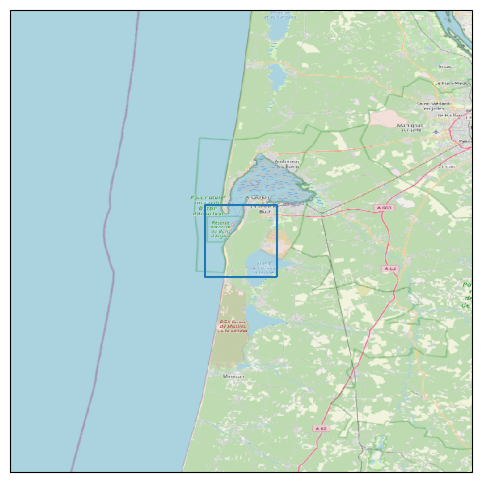

In [16]:
# Delimit area around the La-Test-de-Buch forest

LON_MIN_forest = -1.304
LON_MAX_forest = -1.12
LAT_MIN_forest = 44.457
LAT_MAX_forest = 44.642


# Making a rectangle to clip around area of interest
import geopandas as gpd
from shapely.geometry import box
from fiona.crs import from_epsg
from rasterio.mask import mask

bbox = box(LON_MIN_forest, LAT_MIN_forest, LON_MAX_forest, LAT_MAX_forest)
geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))

f = plt.figure(figsize=(6, 6))                                                     # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.set_extent([LON_MIN_forest-0.5, LON_MAX_forest+0.5, LAT_MIN_forest-0.5, LAT_MAX_forest+0.5],crs=ccrs.PlateCarree())

from cartopy.io.img_tiles import OSM
imagery = OSM()
ax.add_image(imagery, 10)

geo.boundary.plot(ax=ax)

Sentinel-2 images are in the .JPEG2000 format. To open those images, we will use the **`rasterio`** library.

In [17]:
import rasterio
from rasterio.warp import calculate_default_transform

# Extracting the coordinates from bbox for rasterio
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [18]:
print("[INFO] Opening and cropping images might take up to 50-80 seconds depending on where you execute this notebook, we'll optimize it in next notebook version.")
with rasterio.open(wekeo_store['S2B_r_06']) as src:
    geo.to_crs(src.crs, inplace=True)
    coords = getFeatures(geo)
    # cropping the image to the area of interest
    red_06, out_transform = mask(dataset=src, shapes=getFeatures(geo), crop=True)
with rasterio.open(wekeo_store['S2B_g_06']) as src:
    green_06, out_transform = mask(dataset=src, shapes=getFeatures(geo), crop=True)
with rasterio.open(wekeo_store['S2B_b_06']) as src:
    blue_06, out_transform = mask(dataset=src, shapes=getFeatures(geo), crop=True)
with rasterio.open(wekeo_store['S2B_nir_06']) as src:
    nir_06, out_transform = mask(dataset=src, shapes=getFeatures(geo), crop=True)

with rasterio.open(wekeo_store['S2B_r_09']) as src:
    geo.to_crs(src.crs, inplace=True)
    coords = getFeatures(geo)
    red_09, out_transform = mask(dataset=src, shapes=getFeatures(geo), crop=True)
with rasterio.open(wekeo_store['S2B_g_09']) as src:
    green_09, out_transform = mask(dataset=src, shapes=getFeatures(geo), crop=True)
with rasterio.open(wekeo_store['S2B_b_09']) as src:
    blue_09, out_transform = mask(dataset=src, shapes=getFeatures(geo), crop=True)
with rasterio.open(wekeo_store['S2B_nir_09']) as src:
    nir_09, out_transform = mask(dataset=src, shapes=getFeatures(geo), crop=True)

## 4.2. Visualizing the forest

[Go back to the "Table of contents"](#Table-of-contents)

We have opened all the files, let's now visualize the forest, before and after the fires.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


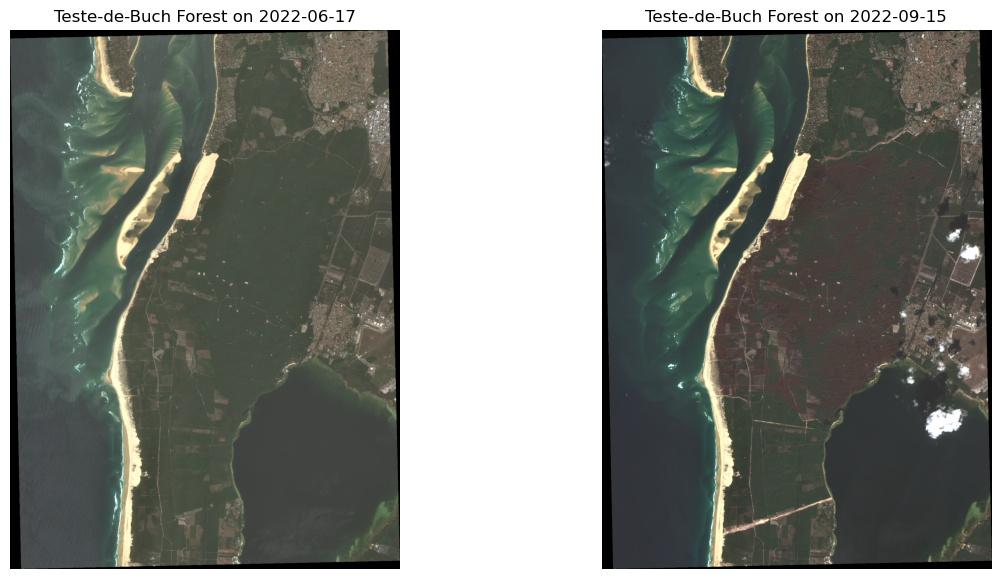

In [19]:
# Visualizing the forest

fig, axes = plt.subplots(1, 2, figsize=(14,7))
img_06 = np.dstack((red_06[0,:,:], green_06[0,:,:], blue_06[0,:,:]))
img_09 = np.dstack((red_09[0,:,:], green_09[0,:,:], blue_09[0,:,:]))

axes[0].imshow(img_06/5000)
axes[0].set_title("Teste-de-Buch Forest on 2022-06-17")
axes[0].axis('off')
axes[1].imshow(img_09/5000)
axes[1].set_title("Teste-de-Buch Forest on 2022-09-15")
axes[1].axis('off');

## 4.3. Characterization of vegetation loss

[Go back to the "Table of contents"](#Table-of-contents)

We can already see the burnt parts of the forest on the September image. In this section we will highlight the vegetation loss using the Normalizaed Difference Vegetation Index (NDVI). This indicator is widely used to evaluate vegetation covers, and has applications especially in the agricultural sector. It is calculated by performing the normalized difference between the red and near infraredspectral bands.

Below is a reminder of the Sentinel-2 bands available at 10 meter resolution (from [Sentinel Online](https://sentinels.copernicus.eu/web/sentinel/user-guides/sentinel-2-msi/resolutions/spatial)). We will use the red band (B4) and NIR band (B8) to calculate the NDVI.

<center>
    <img src="https://mercator.dpi.wekeo.eu:8080/swift/v1/AUTH_e3e873ffa6874f3fad0bb976064606a7/bucketdrive/imgs-training/S2_bands.png" width="800">
</center>

Therefore the formula for calculating NDVI will be: $$\frac{B8 - B4}{B8 + B4}$$

In [20]:
# NDVI calculation for each date

ndvi_06 = ((nir_06-red_06)/(nir_06+red_06))[0,:,:]
ndvi_09 = ((nir_09-red_09)/(nir_09+red_09))[0,:,:]

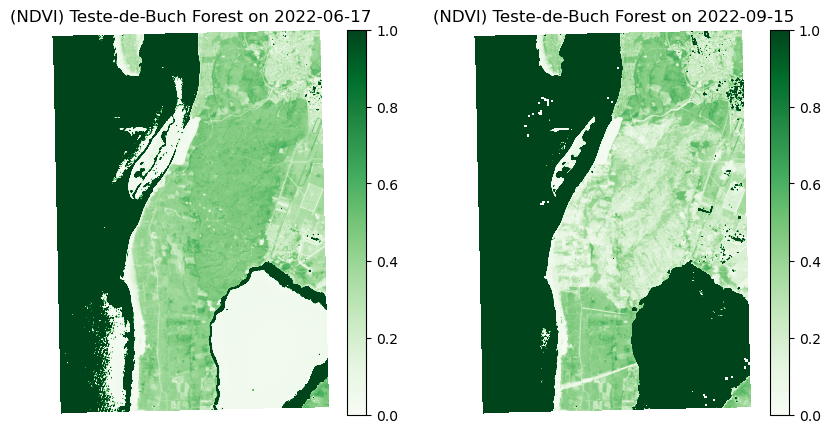

In [21]:
# Plot the figures
fig, axes = plt.subplots(1,2, figsize=(10,5))

im = axes[0].imshow(ndvi_06, cmap='Greens', vmin=0, vmax=1)
axes[0].set_title("(NDVI) Teste-de-Buch Forest on 2022-06-17")
axes[0].axis('off');
cb = plt.colorbar(im)

im= axes[1].imshow(ndvi_09, cmap='Greens', vmin=0, vmax=1)
axes[1].set_title("(NDVI) Teste-de-Buch Forest on 2022-09-15")
axes[1].axis('off');
cb = plt.colorbar(im)

To evaluate the amount of vegetation lost between June and September, let's substract the two NDVI images and threshold the result, in order to keep only the pixels where the NDVI has significantly decreased.

In [22]:
# NDVI substraction
ndvi_var = ndvi_09 - ndvi_06

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


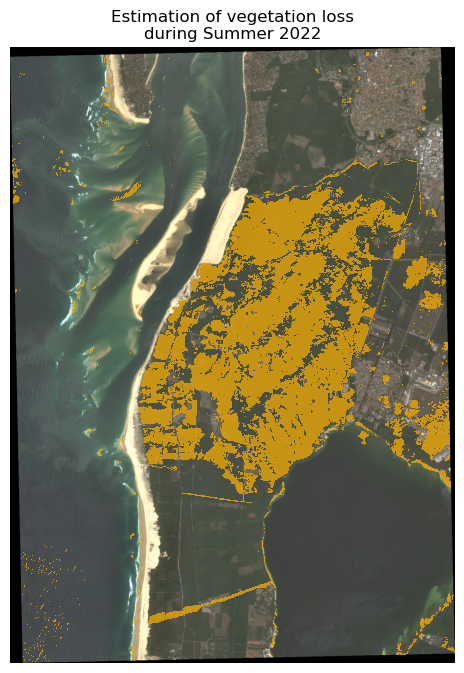

In [23]:
# Displaying the vegetation loss on the image
from matplotlib.colors import ListedColormap
cmap = ListedColormap([(0,0,0,0),(1,0.7,0,0.7)])

# Defining a threshold
thrsh = -0.15

# If under threshold : pixel value is 1, else, it's 0.
ndvi_loss = np.where(ndvi_var < thrsh, 1, 0)

# Plot
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img_06/5000)
ax.imshow(ndvi_loss, cmap=ListedColormap([(0,0,0,0),(1,0.7,0,0.7)]))
ax.axis('off')
ax.set_title("Estimation of vegetation loss\nduring Summer 2022");

We can finally give a rough estimation of the surface of vegetation cover lost during the fires. Knowing that each pixel has a size of 10 by 10 meters, counting the orange pixels will yield the surface of vegetation cover lost. Note that it would be **only a rough estimation**: it can vary with the threshold we have arbitrarily chosen, and on the image there are unwanted orange pixels on the sea, and on areas outside the forest.

In [24]:
# Rough estimation of lost vegetation surface

nb_pixels = ndvi_loss.sum()
surface = nb_pixels/10000
print("Surface burnt is approx: %d km²" % surface)

Surface burnt is approx: 50 km²


# 5. Impact on CO2 in the Bay of Biscay

[Go back to the "Table of contents"](#Table-of-contents)

The fire in the Teste-de-Buch, on the Gironde coast, started on July 12th and ended officially on August 25th. In this section, we will try to see if the fires and their carbon dioxyde emissions had a significant impact on the ocean parameters in the Bay of Biscay. We will compare the mean value of the two parameters over July/August 2022 to the values of previous years over the same months.

## 5.1. Data

[Go back to the "Table of contents"](#Table-of-contents)

In this section, we are going to study the surface partial pressure of CO2 on the water, and the seawater ph. Both of these parameters will be taken from the [Atlantic-Iberian Biscay Irish- Ocean BioGeoChemistry Hindcast](https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3AIBI_MULTIYEAR_BGC_005_003) product, and the [Atlantic-Iberian Biscay Irish- Ocean Biogeochemical Analysis and Forecast](https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3AIBI_ANALYSISFORECAST_BGC_005_004) product. Both of these products provide daily, monthly and yearly averages of the main biogeochemical variables, including ph and CO2 partial pressure.

We are associating those two products because the first one covers the period 1993-2020, the other one covers the period 2020-2023, and we want to compare many years. We will take the years 2000 to 2020 from the "Hindcast" product, and the years 2021 and 2022 from the "Analysis and Forecast" product. As those two products are calculated using the same model named PISCES, we consider that for the needs of this training it is reasonable to concatenate data from the two products.

| Parameter | Value | Value |
| :--- | :---|:--- |
|**Product name**|Atlantic-Iberian Biscay Irish- Ocean BioGeoChemistry Hindcast|Atlantic-Iberian Biscay Irish- Ocean Biogeochemical Analysis and Forecast|
| **variables used ** | `spco2`, `ph` | `spco2`, `ph` |
| **Product identifier** | [EO:MO:DAT:IBI_MULTIYEAR_BGC_005_003](https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3AIBI_MULTIYEAR_BGC_005_003) | [EO:MO:DAT:IBI_ANALYSISFORECAST_BGC_005_004](https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3AIBI_ANALYSISFORECAST_BGC_005_004) |
| **Spatial resolution** | 0.083° × 0.083° | 0.028° × 0.028° |
| **Temporal coverage** | from 1993-01-01 to 2020-12-31 | from 2019-05-04 to now |
|**Years used**| 2000-2020 | 2021-2022 |

<center>
    <img src="https://mercator.dpi.wekeo.eu:8080/swift/v1/AUTH_e3e873ffa6874f3fad0bb976064606a7/bucketdrive/imgs-training/IBI_thumbnail.png" width="200">
</center>


The products are already downloaded and located in `wekeo_store` cloud folder, under `co2_cmems/` and `ph_cmems/`, thanks to [**this method (read more)**](https://help.wekeo.eu/en/articles/6589137-how-to-get-copernicus-marine-data-hosted-on-wekeo).

## 5.2. Impact on the CO2 partial pressure

[Go back to the "Table of contents"](#Table-of-contents)

Let's first delimit the area we will be working on this time. We will spatially average the data over this area and look at its evolution over time.

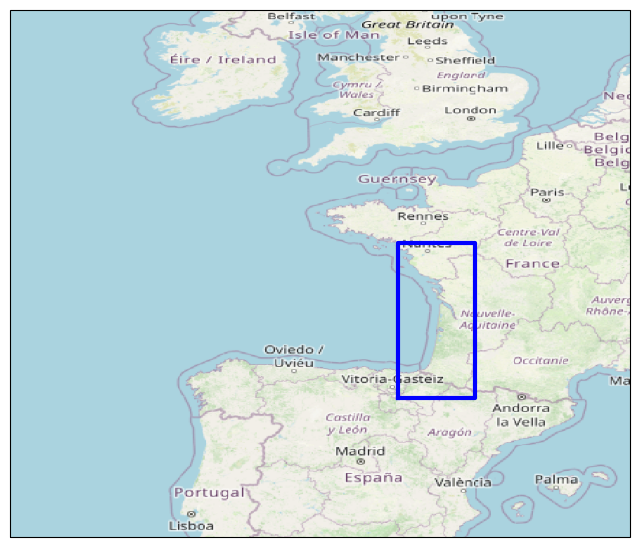

In [25]:
# Defining the boundaries of the area of interest
LAT_MIN_aoi = 42.5
LAT_MAX_aoi = 47.5
LON_MIN_aoi = -2.5
LON_MAX_aoi = 0

# Plot
f = plt.figure(figsize=(8, 8))                                                     # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.set_extent([LON_MIN, LON_MAX, LAT_MIN, LAT_MAX],crs=ccrs.PlateCarree())   

from cartopy.io.img_tiles import OSM
imagery = OSM()
ax.add_image(imagery, 5)

ax.plot([LON_MIN_aoi, LON_MAX_aoi, LON_MAX_aoi, LON_MIN_aoi, LON_MIN_aoi], [LAT_MIN_aoi, LAT_MIN_aoi, LAT_MAX_aoi, LAT_MAX_aoi, LAT_MIN_aoi],
         color='b', linewidth=3)

In [26]:
# Open file objects
co2_reanalysis = fsspec.open(wekeo_store['co2_reanalysis']).open()
co2_analysis = fsspec.open(wekeo_store['co2_analysis']).open()
# Read CO2 data with xarray
ds_co2_2000_2020 = xr.open_dataset(co2_reanalysis)
ds_co2_2021_2022 = xr.open_dataset(co2_analysis)
ds_co2_2000_2020

<xarray.Dataset>
Dimensions:    (time: 252, latitude: 61, longitude: 61)
Coordinates:
  * latitude   (latitude) float32 42.5 42.58 42.67 42.75 ... 47.33 47.42 47.5
  * time       (time) datetime64[ns] 2000-01-16T12:00:00 ... 2020-12-16T12:00:00
  * longitude  (longitude) float32 -5.0 -4.917 -4.833 ... -0.08333 -7.6e-07
Data variables:
    spco2      (time, latitude, longitude) float32 ...
Attributes: (12/22)
    Conventions:                        CF-1.0
    source:                             CMEMS IBI-MFC
    institution:                        Puertos del Estado (PdE) - Mercator-O...
    references:                         http://marine.copernicus.eu
    title:                              CMEMS IBI REANALYSIS: MONTHLY BIOGEOC...
    easting:                            longitude
    ...                                 ...
    contact:                            mailto: servicedesk.cmems@mercator-oc...
    bulletin_date:                      2023-01-01
    bulletin_type:                      Reanalysis
    _CoordSysBuilder:                   ucar.nc2.dataset.conv.CF1Convention
    comment:                            
    history:                            Data extracted from dataset http://lo...

In [27]:
# Selecting only July and August in the data, and computing yearly average
ds_co2_2000_2020 = ds_co2_2000_2020.sel(time=ds_co2_2000_2020.time.dt.month.isin([7,8])).resample(time='1A').mean('time')
ds_co2_2021_2022 = ds_co2_2021_2022.sel(time=ds_co2_2021_2022.time.dt.month.isin([7,8])).resample(time='1A').mean('time')

In [28]:
# Computing spatial average
spco2_avg_2000_2020 = ds_co2_2000_2020.mean(dim=["longitude", "latitude"],skipna=True).squeeze()
spco2_avg_2021_2022 = ds_co2_2021_2022.mean(dim=["longitude", "latitude"],skipna=True).squeeze()

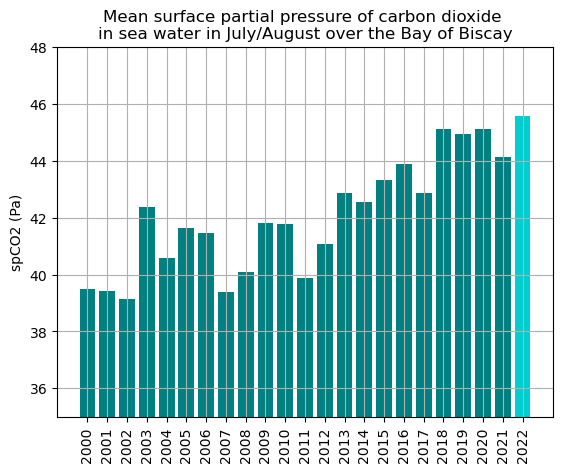

In [29]:
# Plot
x = range(2000, 2021)

fig, ax = plt.subplots()
ax.bar(x, spco2_avg_2000_2020['spco2'].data, color='teal')
ax.bar([2021], spco2_avg_2021_2022['spco2'].data[0], color='teal')
# plotting 2022 separately to give it a different color
ax.bar([2022], spco2_avg_2021_2022['spco2'].data[1], color='darkturquoise')
ax.grid(True)
ax.set_ylim(35,48)
ax.set_title('Mean surface partial pressure of carbon dioxide \nin sea water in July/August over the Bay of Biscay')
ax.set_ylabel('spCO2 (Pa)')
ax.set_xticks(range(2000,2023))
ax.set_xticklabels(range(2000,2023), rotation=90);

## 5.3. Impact on the seawater pH

[Go back to the "Table of contents"](#Table-of-contents)

In [30]:
# Open file objects
ph_reanalysis = fsspec.open(wekeo_store['ph_reanalysis']).open()
ph_analysis = fsspec.open(wekeo_store['ph_analysis']).open()
# Read pH data with xarray
ds_ph_2000_2020 = xr.open_dataset(ph_reanalysis)
ds_ph_2021_2022 = xr.open_dataset(ph_analysis)
ds_ph_2000_2020

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 61, time: 252, longitude: 61)
Coordinates:
  * depth      (depth) float32 0.5058
  * latitude   (latitude) float32 42.5 42.58 42.67 42.75 ... 47.33 47.42 47.5
  * time       (time) datetime64[ns] 2000-01-16T12:00:00 ... 2020-12-16T12:00:00
  * longitude  (longitude) float32 -5.0 -4.917 -4.833 ... -0.08333 -7.6e-07
Data variables:
    ph         (time, depth, latitude, longitude) float32 ...
Attributes: (12/22)
    Conventions:                        CF-1.0
    source:                             CMEMS IBI-MFC
    institution:                        Puertos del Estado (PdE) - Mercator-O...
    references:                         http://marine.copernicus.eu
    title:                              CMEMS IBI REANALYSIS: MONTHLY BIOGEOC...
    easting:                            longitude
    ...                                 ...
    contact:                            mailto: servicedesk.cmems@mercator-oc...
    bulletin_date:                      2023-01-01
    bulletin_type:                      Reanalysis
    _CoordSysBuilder:                   ucar.nc2.dataset.conv.CF1Convention
    comment:                            
    history:                            Data extracted from dataset http://lo...

In [31]:
# Selecting only July and August in the data, and computing yearly average

ds_ph_past = ds_ph_2000_2020.sel(time=ds_ph_2000_2020.time.dt.month.isin([7,8])).resample(time='1A').mean('time')
ds_ph_pres = ds_ph_2021_2022.sel(time=ds_ph_2021_2022.time.dt.month.isin([7,8])).resample(time='1A').mean('time')

In [32]:
# Computing spatial average

ph_avg_past = ds_ph_past.mean(dim=["longitude", "latitude"],skipna=True).sel(depth=0.0, method='nearest').squeeze()
ph_avg_pres = ds_ph_pres.mean(dim=["longitude", "latitude"],skipna=True).sel(depth=0.0, method='nearest').squeeze()

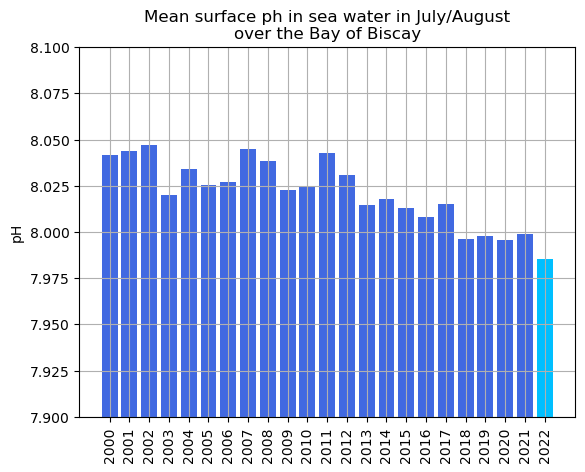

In [33]:
# Plot
x = range(2000, 2021)

fig, ax = plt.subplots()
ax.bar(x, ph_avg_past['ph'].data, color='royalblue')
ax.bar([2021], ph_avg_pres['ph'].data[0], color='royalblue')

# plotting 2022 separately to give it a different color
ax.bar([2022], ph_avg_pres['ph'].data[1], color='deepskyblue')
ax.grid(True)
ax.set_ylim(7.9,8.1)
ax.set_title('Mean surface ph in sea water in July/August\nover the Bay of Biscay')
ax.set_ylabel('pH')
ax.set_xticks(range(2000,2023))
ax.set_xticklabels(range(2000,2023), rotation=90);

On the area that we selected, it seems that 2022 is the year when CO2 partial pressure has been the highest in July and August in the last 20 years, and where the seawater has been the most acid. This seems to support our hypothesis that the 2022 wildfires caused more CO2 pressure on the ocean and therefore caused the acidification of the water. However, **it is not possible to conclude thanks to these results alone**, because they don't establish a clear link to the wildfires. First, there is a clear increasing/decreasing trend over the year for both variables, this needs to be taken into account. There are also other parameters that can drive CO2 surface pressure and seawater pH, like temperature, and 2022 has been an exceptionnal year in terms of temperature as well. One could also for example perform a similar analysis on an area that has not been affected by wildfires in this period.

However, even if we didn't significant results in this particular case, wildfires are known to affect water chemistry. [Evans et al](https://doi.org/10.1007/s10021-016-0064-1) showed their biochemical impacts in a mountain lake. The study showed large peaks of nitrate concentrations after the fire, and found evidence of high acid depositions. [Scordo et al](https://doi.org/10.1038/s41598-021-89926-6) also highlighted the impact of wildfire smokes on the light regimes and primary production in the water. The connection of wildfires to aquatic ecosystems remains an important issue, as such events are expected to become more and more frequent in the next decades.


# 6. Conclusion

[Go back to the "Table of contents"](#Table-of-contents)

In this notebook we have studied the wildfires that took places in the Gironde Region during the Summer 2022. We spotted the fires by studying the carbon monoxide emissions and estimated the surface of lost vegetation cover by analyzing satellite images. We finally tried to assess the impact of the fires on the ocean parameters, without finding significant results in this particular case.

# 7. Exercises

[Go back to the "Table of contents"](#Table-of-contents)

Here is a set of exercises we propose for you to go further into the analysis. There are 3 levels depending on how much Python code you need to write to answer the questions. If you need help, do not hesitate to contact the service desk: **support@wekeo.eu**!

**Beginners**:
- In [Section 3.3.3](#3.3.3.-Plotting-a-map-and-spotting-a-wildifre) we have plotted a map of the Carbon Monoxide emission. You can try too look at other variables that are in the dataset: the PM10 or the PM2.5 concentrations. 
- In [Section 3.3.3](#3.2.-Open-multiple-SST-observation-products-and-concatenate-them-altogether) we have plotted a map of the Carbon Monoxide emissions at a specific date. Try plotting the map for other dates, and see how the CO2 emissions evolve!

**Intermediate**:

- In [Section 4.3](#4.3.-Characterization-of-vegetation-loss), we gave a rough estimation of the surface of burnt vegetation cover. It was obviously biased because we counted pixels that were not in the forest. Can you narrow the area of interest strictly to the forest to give a better estimation?

- In [Section 4](#4.-Estimating-vegetation-loss-with-satellite-images), we used the Sentinel-2 10-meters resolution spectral bands to compute the NDVI indicator and estimate vegetation cover. There are many indicators that can be calculated using Sentinel-2 data. For example the **NDWI** (Normalized Difference Water Index), which is used to monitor changes in the content of water bodies. You can try to calculate this indicator to monitor the droughts that happened in Summer 2022!
$$ NDWI=\frac{B3-B8}{B3+B8}$$

**Advanced**:
- In this notebook, we have focused our analysis on the 2022 wildfires in the Gironde region. You can reproduce such an analysis for another major wildfire event.

<div class="alert alert-block alert-success">
    <b>Congratulations !!</b><br>
  
--- 

##### **And thank you for your attention! :)** 
    
    
We hope you enjoyed this Jupyter Notebook training.

You now have plenty of tools to study air quality data, satellite images and ocean variables. Feel free to re-use and adapt all the Python scripts of this notebook to your needs! 

This training course is over but we'd love to hear from you about how we could improve it (topics, tools, storytelling, format, speed etc). If you have any question, do not hesitate to contact us using our [**live chat widget**](https://www.wekeo.eu/support) or asynchronously at [support@wekeo.eu](support@wekeo.eu) !


## Additional Information
---

#### Compatible Data Science Toolkits

In [34]:
import xarray; print(xarray.__version__)

2023.2.0


#### Last Modified and Tested

In [35]:
from datetime import date; print(date.today())

2023-03-12


<img src='https://github.com/wekeo/ai4EM_MOOC/raw/04147f290cfdcce341f819eab7ad037b95f25600/img/ai4eo_logos.jpg' alt='Logo EU Copernicus WEkEO' align='center' width='100%'></img>